<a href="https://colab.research.google.com/github/LAGABI44/Project-AIFFELTHON/blob/main/code/2.%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D/05_Data_%08Kmeans_%EC%9D%B4%ED%98%B8%EB%B9%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  1.데이터 확인

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
%config InlineBackend.figure_format = 'retina'

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
plt.rc('font', family='NanumBarunGothic') 

### 데이터 불러오기

In [ ]:
import os

# 다운로드 받은 파일을 판다스의 read_csv 를 통해 읽어옵니다.
# 파일을 읽어온 후 shape 로 행과 열의 수를 출력합니다.
# csv_path = '/content/drive/MyDrive/health/data/data_2.csv'
csv_path = '/content/drive/MyDrive/아이펠해커톤_2/data_dis01.csv'
df2 = pd.read_csv(csv_path, encoding='cp949')

df = df2.copy()
pd.set_option('display.max_columns', None) # 컬럼 수가 많으므로 요약되어 표시되지 않게 합니다.
# sample, head, tail : 데이터 미리보기
df # 데이터를 확인합니다.

,SEX,BTH_G,SBP,DBP,FBS,DIS,BMI,B_pressure,B_sugar
0,0,1,116,78,94,4,16.6,0,0
1,0,1,100,60,79,4,22.3,0,0
2,0,1,100,60,87,4,21.9,0,0
3,0,1,111,70,72,4,20.2,0,0
4,0,1,120,80,98,4,20.0,0,0
...,...,...,...,...,...,...,...,...,...
999995,1,27,120,70,81,2,23.1,1,0
999996,1,27,110,70,104,2,27.2,1,0
999997,1,27,115,53,110,1,25.2,1,1
999998,1,27,120,70,90,2,19.7,1,0


In [ ]:
# # dtypes를 통해 데이터 형식만 출력
# df.dtypes

# info를 통해 데이터의 크기, 형식, 메모리 사용량 등을 봅니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   SEX         1000000 non-null  int64  
 1   BTH_G       1000000 non-null  int64  
 2   SBP         1000000 non-null  int64  
 3   DBP         1000000 non-null  int64  
 4   FBS         1000000 non-null  int64  
 5   DIS         1000000 non-null  int64  
 6   BMI         1000000 non-null  float64
 7   B_pressure  1000000 non-null  int64  
 8   B_sugar     1000000 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 68.7 MB


### 결측치 확인

In [ ]:
# Null 값 여부 확인
df.isnull().sum()

SEX           0
BTH_G         0
SBP           0
DBP           0
FBS           0
DIS           0
BMI           0
B_pressure    0
B_sugar       0
dtype: int64

### 기초 통계 분석

In [ ]:
# 기초 통계량을 살펴봅니다.
df.describe()

,SEX,BTH_G,SBP,DBP,FBS,DIS,BMI,B_pressure,B_sugar
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,0.489773,13.905268,121.871763,75.787874,98.864428,3.471040,23.804029,0.259338,0.096512
std,0.499896,7.006442,14.561706,9.793411,22.981300,0.946151,3.297287,0.438272,0.295292
min,0.000000,1.000000,82.000000,50.000000,60.000000,1.000000,14.800000,0.000000,0.000000
25%,0.000000,9.000000,110.000000,70.000000,87.000000,3.000000,21.500000,0.000000,0.000000
50%,0.000000,14.000000,120.000000,76.000000,94.000000,4.000000,23.600000,0.000000,0.000000
75%,1.000000,19.000000,130.000000,80.000000,104.000000,4.000000,25.800000,1.000000,0.000000
max,1.000000,27.000000,190.000000,120.000000,358.000000,4.000000,40.300000,1.000000,1.000000


In [ ]:
df.head()

,SEX,BTH_G,SBP,DBP,FBS,DIS,BMI,B_pressure,B_sugar
0,0,1,116,78,94,4,16.6,0,0
1,0,1,100,60,79,4,22.3,0,0
2,0,1,100,60,87,4,21.9,0,0
3,0,1,111,70,72,4,20.2,0,0
4,0,1,120,80,98,4,20.0,0,0


In [ ]:
df.tail()

,SEX,BTH_G,SBP,DBP,FBS,DIS,BMI,B_pressure,B_sugar
999995,1,27,120,70,81,2,23.1,1,0
999996,1,27,110,70,104,2,27.2,1,0
999997,1,27,115,53,110,1,25.2,1,1
999998,1,27,120,70,90,2,19.7,1,0
999999,1,27,116,73,92,4,17.6,0,0


## 2.데이터 시각화

In [ ]:
def bth_age():
  bth_dic = {
      1 : '20',
      2 : '20',
      3 : '20',
      4 : '20',
      5 : '30',
      6 : '30',
      7 : '30',
      8 : '30',
      9 : '30',
      10 : '40',
      11 : '40',
      12 : '40',
      13 : '40',
      14 : '40',
      15 : '50',
      16 : '50',
      17 : '50',
      18 : '50',
      19 : '50',
      20 : '60',
      21 : '60',
      22 : '60',
      23 : '60',
      24 : '60',
      25 : '70',
      26 : '70',
      27 : '75-'
      }
  age_list = []
  for i in range(1,28):
    age_list.append(bth_dic[i])
  return age_list

In [ ]:
graph_df = df.copy()
graph_df.head()

,SEX,BTH_G,SBP,DBP,FBS,DIS,BMI,B_pressure,B_sugar
0,0,1,116,78,94,4,16.6,0,0
1,0,1,100,60,79,4,22.3,0,0
2,0,1,100,60,87,4,21.9,0,0
3,0,1,111,70,72,4,20.2,0,0
4,0,1,120,80,98,4,20.0,0,0


In [ ]:
graph_df = graph_df.astype({'SEX':'object', 'BTH_G':'object'})

In [ ]:
graph_df.loc[graph_df['SEX']==0,'SEX'] = 'Male'
graph_df.loc[graph_df['SEX']==1,'SEX'] = 'Female'

In [ ]:
age_list = bth_age()
age_list
len(age_list)

27

In [ ]:
for i in graph_df['BTH_G'].unique():
  graph_df.loc[graph_df['BTH_G']==i,'BTH_G'] = age_list[i-1]

In [ ]:
graph_df.rename(columns = {'BTH_G':'AGE'}, inplace=True)
graph_df

,SEX,AGE,SBP,DBP,FBS,DIS,BMI,B_pressure,B_sugar
0,Male,20,116,78,94,4,16.6,0,0
1,Male,20,100,60,79,4,22.3,0,0
2,Male,20,100,60,87,4,21.9,0,0
3,Male,20,111,70,72,4,20.2,0,0
4,Male,20,120,80,98,4,20.0,0,0
...,...,...,...,...,...,...,...,...,...
999995,Female,75-,120,70,81,2,23.1,1,0
999996,Female,75-,110,70,104,2,27.2,1,0
999997,Female,75-,115,53,110,1,25.2,1,1
999998,Female,75-,120,70,90,2,19.7,1,0


In [ ]:
col_list = ['SBP','DBP','FBS',"BMI"]
col_list

['SBP', 'DBP', 'FBS', 'BMI']

### 성별과 나이별 각 컬럼(SBP, DBP, FBS, BMI) 평균 

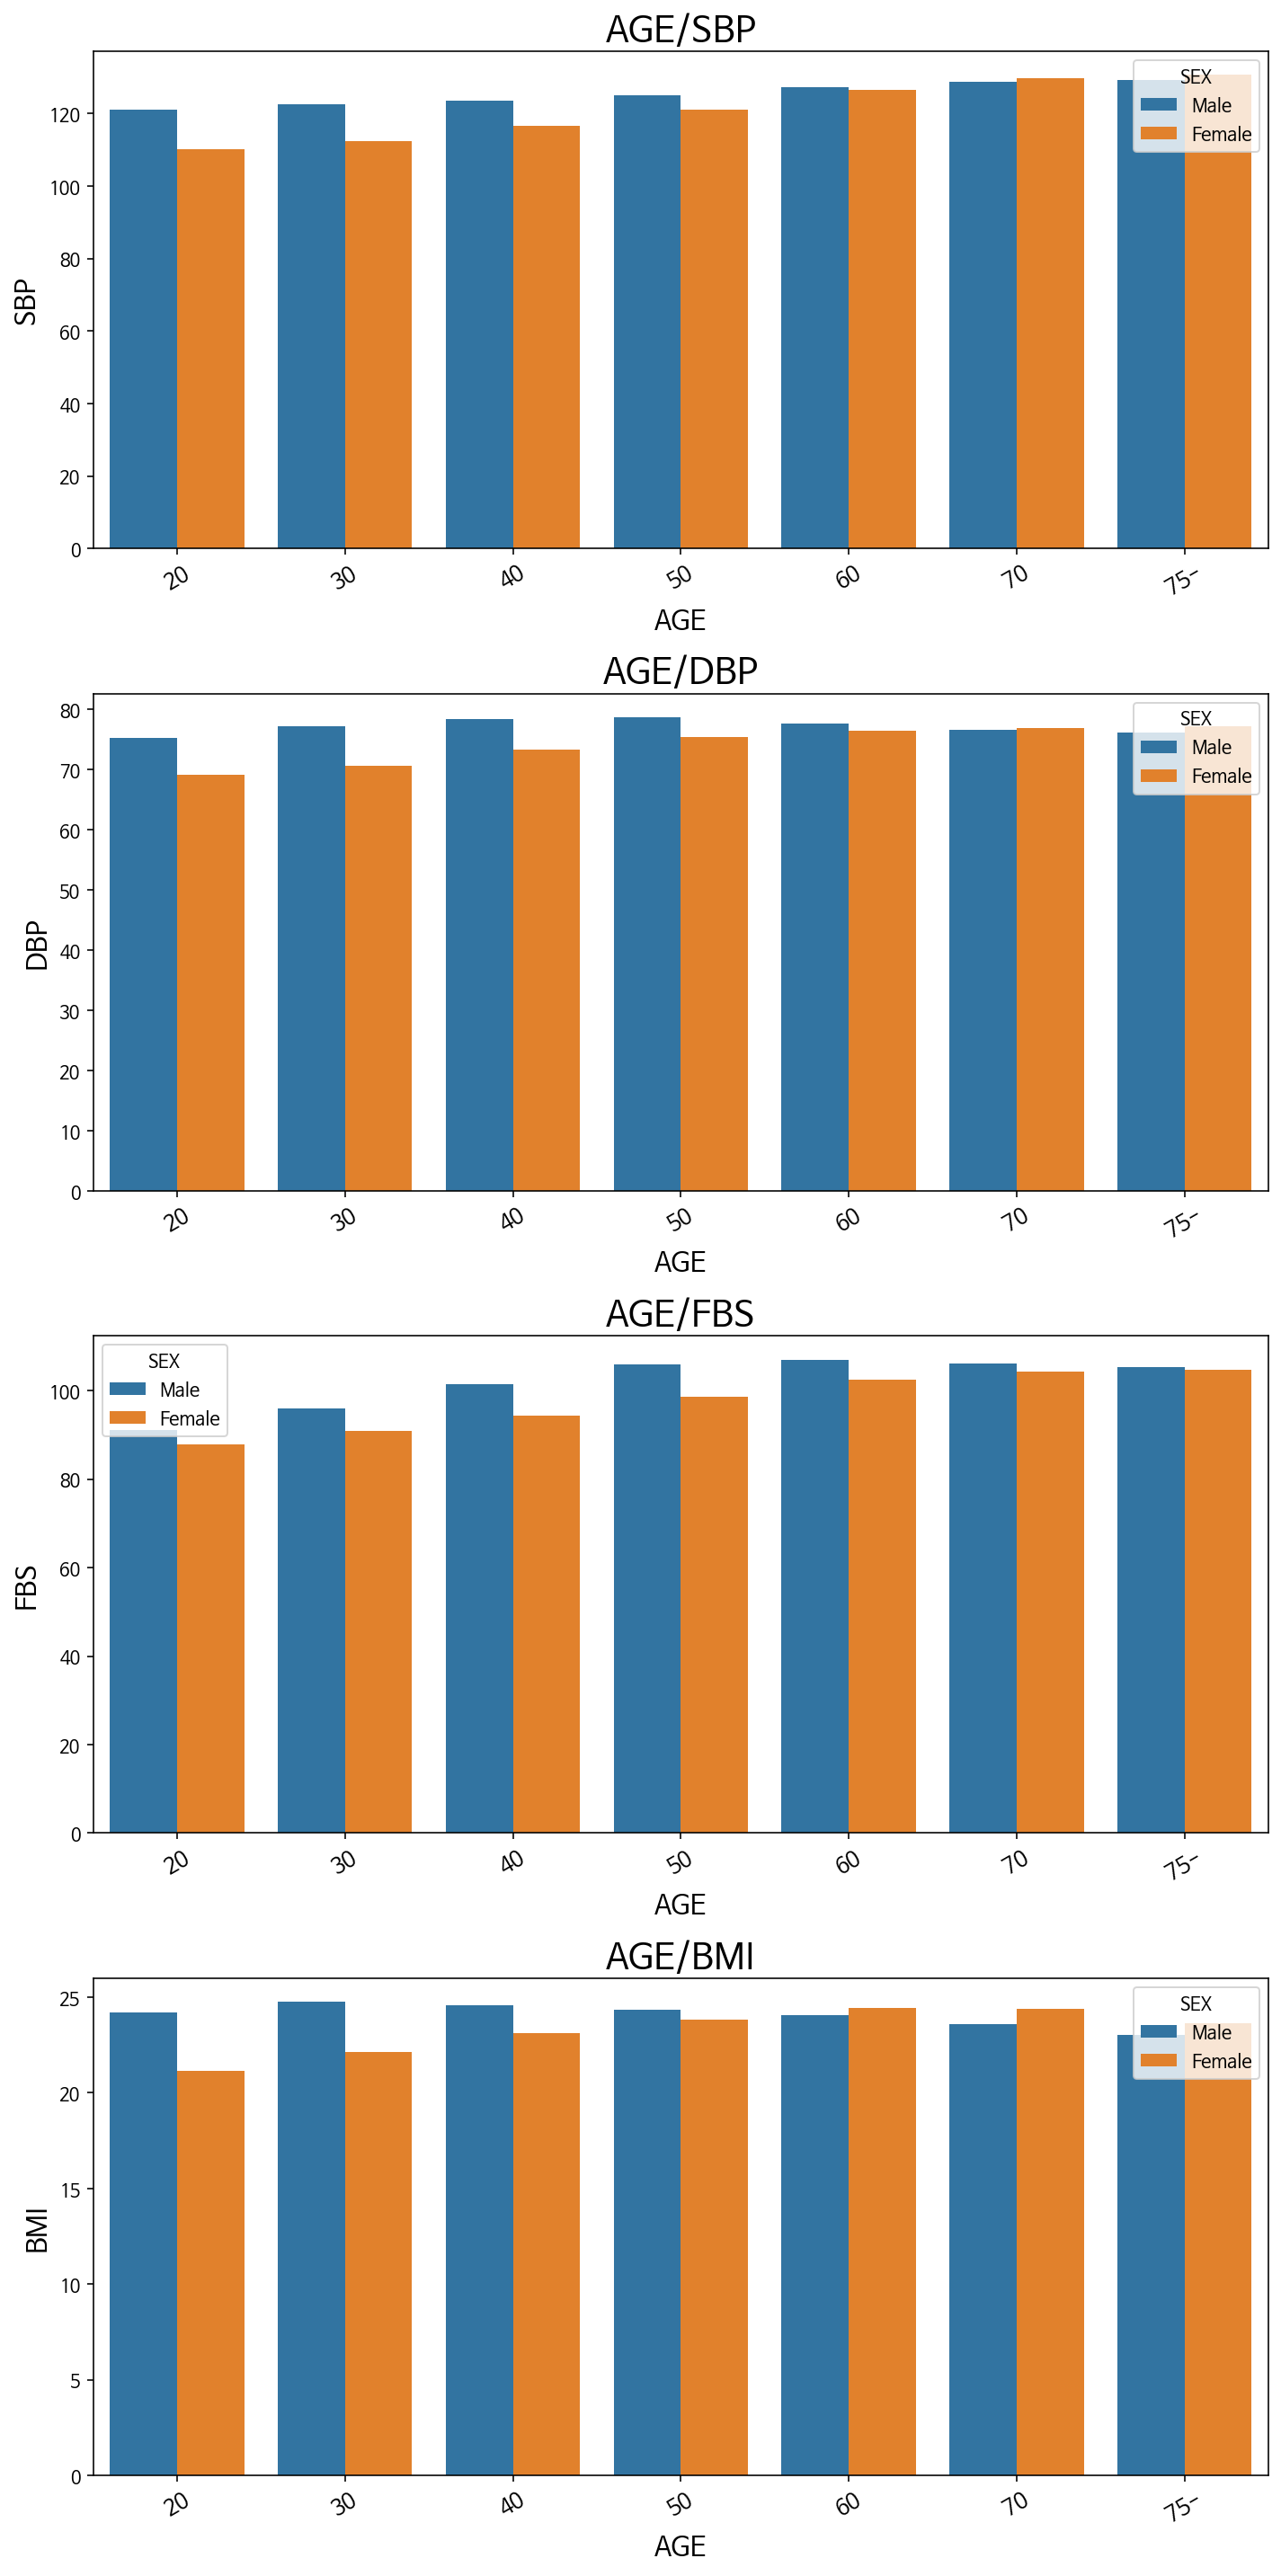

In [ ]:
plt.figure(figsize=(10,20))
for i in range(len(col_list)):
  plt.subplot(4,1,i+1)
  ax = sns.barplot(data=graph_df, x='AGE', y=col_list[i], hue='SEX',ci=None)
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 30,size=12)
  ax.set_xlabel('AGE',fontsize = 15)
  ax.set_ylabel(col_list[i],fontsize = 15)
  ax.set_title(f"AGE/{col_list[i]}", fontsize = 20)
plt.tight_layout()
plt.show()

### 성별별 각 컬럼(SBP, DBP, FBS, BMI) 분포
- 각 컬럼에 대한 남녀 평균 선


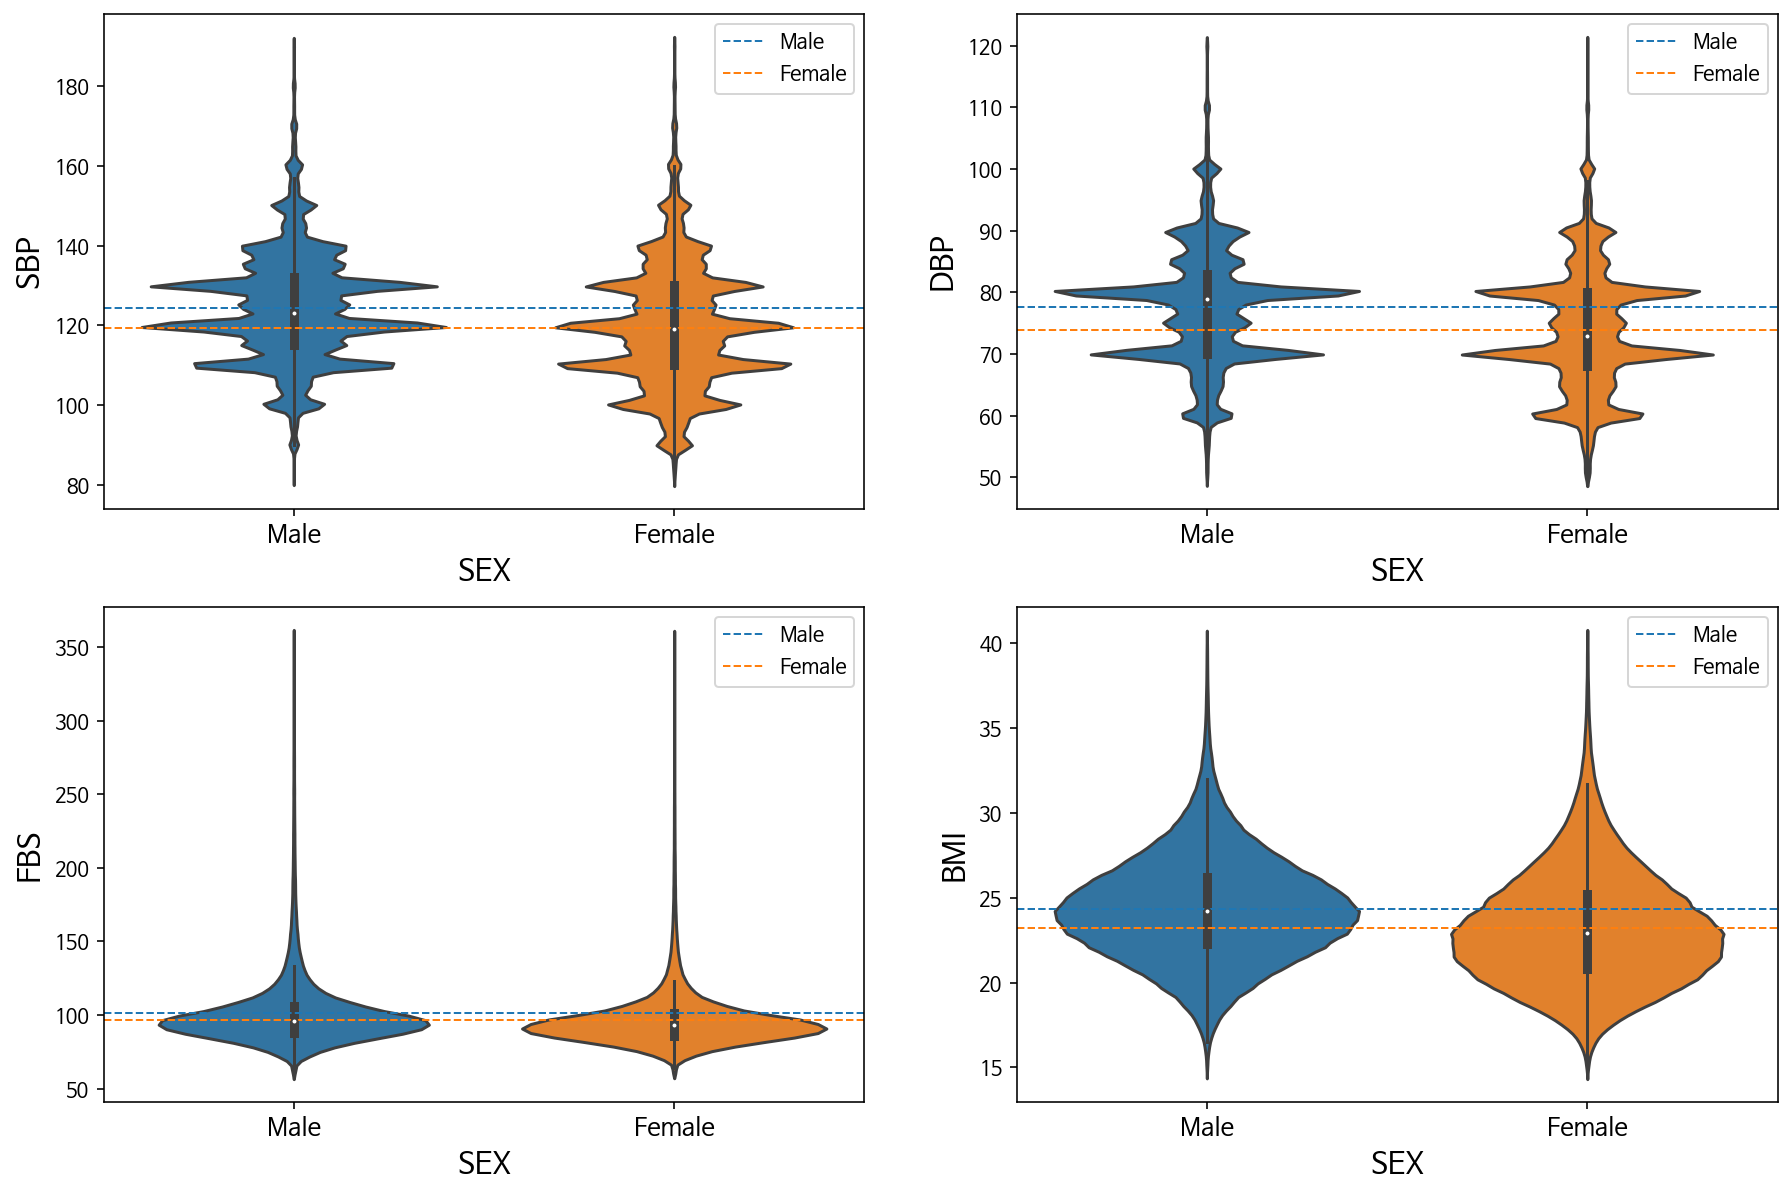

In [ ]:
plt.figure(figsize=(15,10))
for i in range(len(col_list)):
  plt.subplot(2,2,i+1)
  ax = sns.violinplot(data=graph_df,y=col_list[i],x='SEX')
  ax.set_xticklabels(ax.get_xticklabels(), size=12)
  ax.set_xlabel('SEX',fontsize = 15)
  ax.set_ylabel(col_list[i],fontsize = 15)
  m = graph_df.loc[graph_df['SEX']=='Male',col_list[i]].mean()
  ax1 = plt.axhline(y=m, color='tab:blue', linestyle='--', linewidth=1, label='Male')
  f = graph_df.loc[graph_df['SEX']=='Female',col_list[i]].mean()
  ax2 = plt.axhline(y=f, color='tab:orange', linestyle='--', linewidth=1, label='Female')
  plt.legend()
plt.show()

#### 각 컬럼 정상범위
- 수축기 혈압(SBP) 120미만
- 이완기 혈압(DBP) 80미만
- 공복혈당(FBS) 126미만

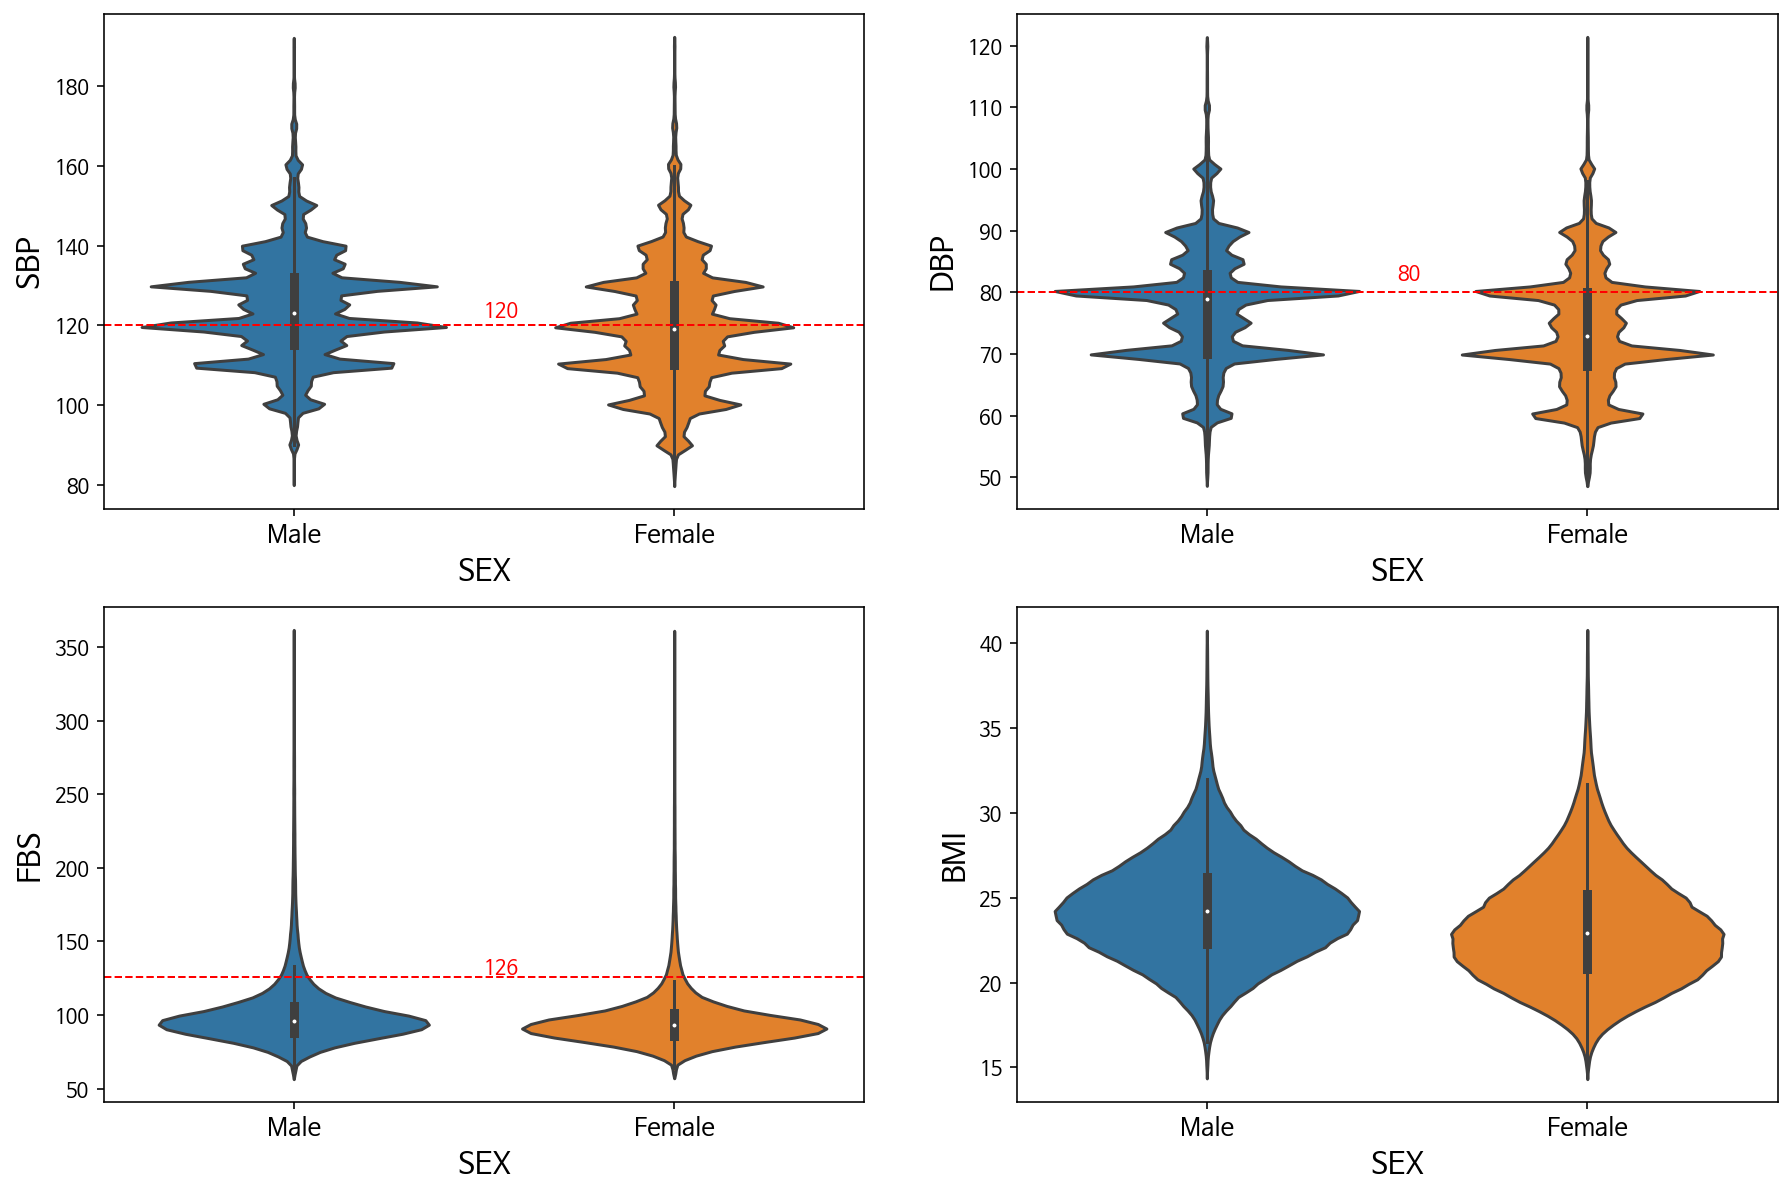

In [ ]:
plt.figure(figsize=(15,10))
for i in range(len(col_list)):
  plt.subplot(2,2,i+1)
  ax = sns.violinplot(data=graph_df,y=col_list[i],x='SEX')
  ax.set_xticklabels(ax.get_xticklabels(), size=12)
  ax.set_xlabel('SEX',fontsize = 15)
  ax.set_ylabel(col_list[i],fontsize = 15)
  if i == 0:
    plt.axhline(y=120,color='r', linestyle='--',linewidth=1)
    plt.text(0.5,122,'120',color='r')
  elif i == 1:
    plt.axhline(y=80,color='r', linestyle='--',linewidth=1)
    plt.text(0.5,82,'80',color='r')
  elif i == 2:
    plt.axhline(y=126,color='r', linestyle='--',linewidth=1)
    plt.text(0.5,128,'126',color='r')  
plt.show()

### 질병내역별 각 컬럼(SBP, DBP, FBS, BMI) 분포
- 각 컬럼에 대한 질병 평균 선

In [ ]:
col_list

['SBP', 'DBP', 'FBS', 'BMI']

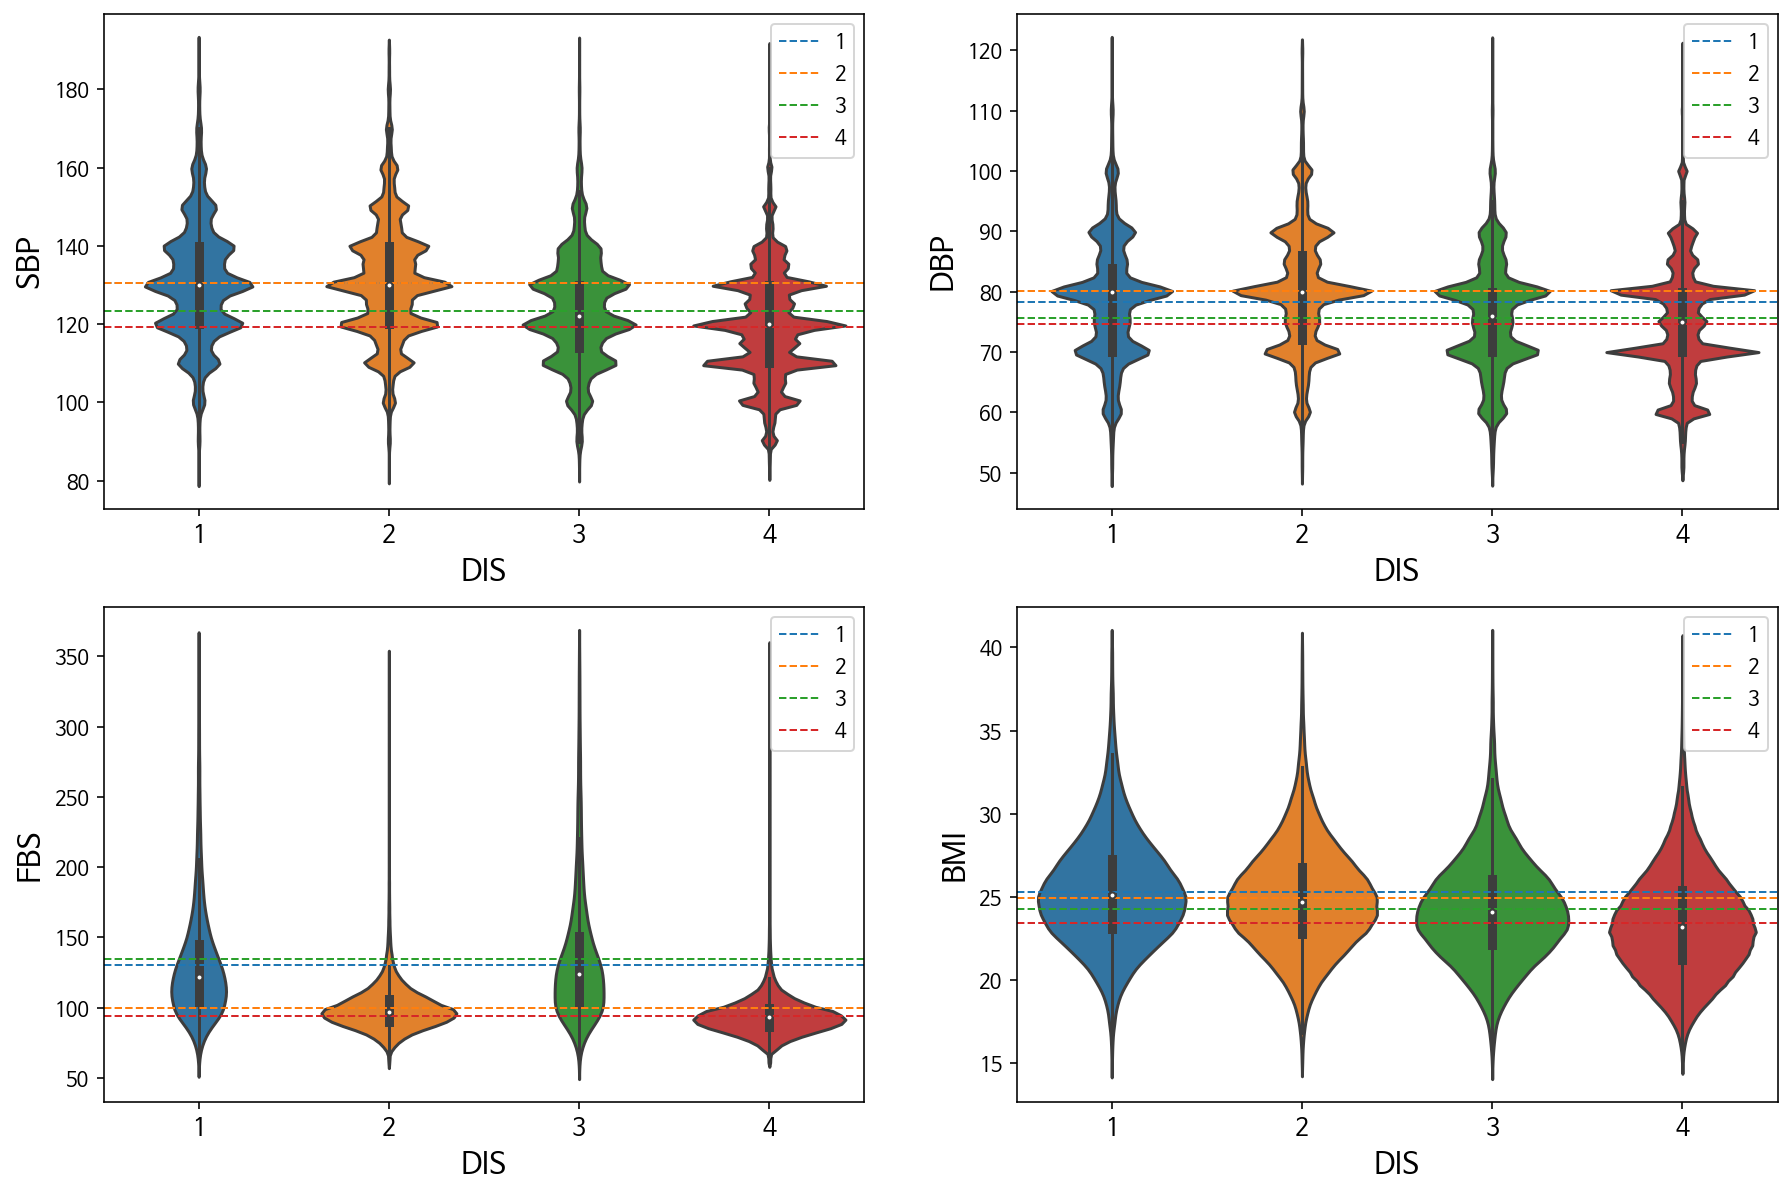

In [ ]:
col_list = list(graph_df.iloc[:,[2,3,4,6]].columns)
color_list = ['tab:blue','tab:orange','tab:green','tab:red']
plt.figure(figsize=(15,10))
for i in range(4):
  plt.subplot(2,2,i+1)
  ax = sns.violinplot(data=df,y=col_list[i],x='DIS')
  ax.set_xticklabels(ax.get_xticklabels(), size=12)
  ax.set_xlabel('DIS',fontsize = 15)
  ax.set_ylabel(col_list[i],fontsize = 15)
  for j in range(4):
    y = graph_df.loc[graph_df['DIS']==j+1,col_list[i]].mean()
    ax1 = plt.axhline(y=y, color=color_list[j], linestyle='--', linewidth=1, label=j+1)
  plt.legend()
plt.show()

### 나이별 질병내역 Count

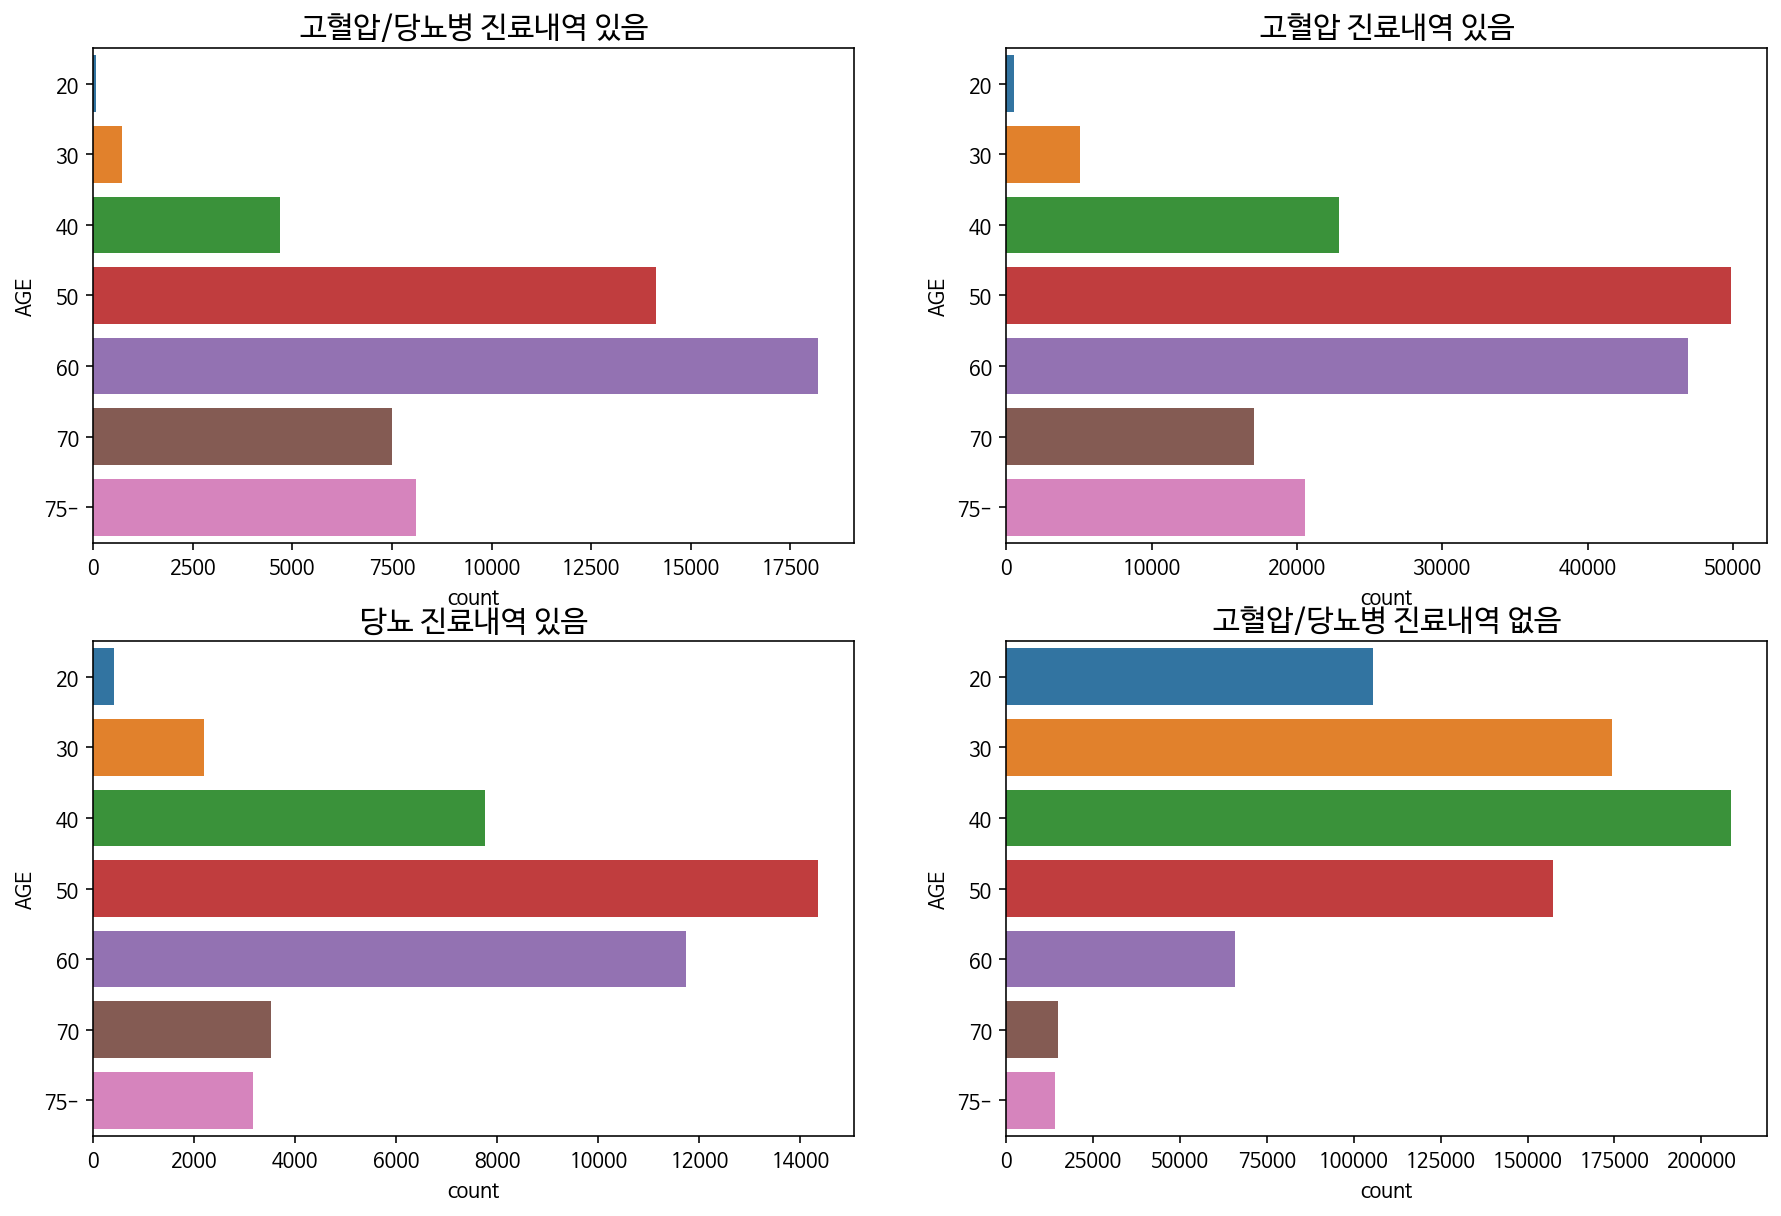

In [ ]:
title_list = ['고혈압/당뇨병 진료내역 있음', '고혈압 진료내역 있음', '당뇨 진료내역 있음', '고혈압/당뇨병 진료내역 없음']
plt.figure(figsize=(15,10))
for i in range(4):
  plt.subplot(2,2,i+1)
  datai = graph_df[graph_df['DIS'] == (i+1)]
  snsbar = sns.countplot(y='AGE',data=datai)
  snsbar.set_title(title_list[i],fontsize=15)
plt.show()

In [ ]:
DIS_item = np.sort(df['DIS'].unique())
DIS_list = []
for i in DIS_item:
  num = (df['DIS'] == i).sum()
  DIS_list.append(num)
for i in DIS_item:
  print(f"{i}: {DIS_list[i-1]}명",end=' ')
print()
print(f"총 인원 {sum(DIS_list)}명")

1: 53398명 2: 162826명 3: 43114명 4: 740662명 
총 인원 1000000명


In [ ]:
DIS_item = [str(i) for i in DIS_item]
DIS_item

['1', '2', '3', '4']

### 질병내역 Count

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


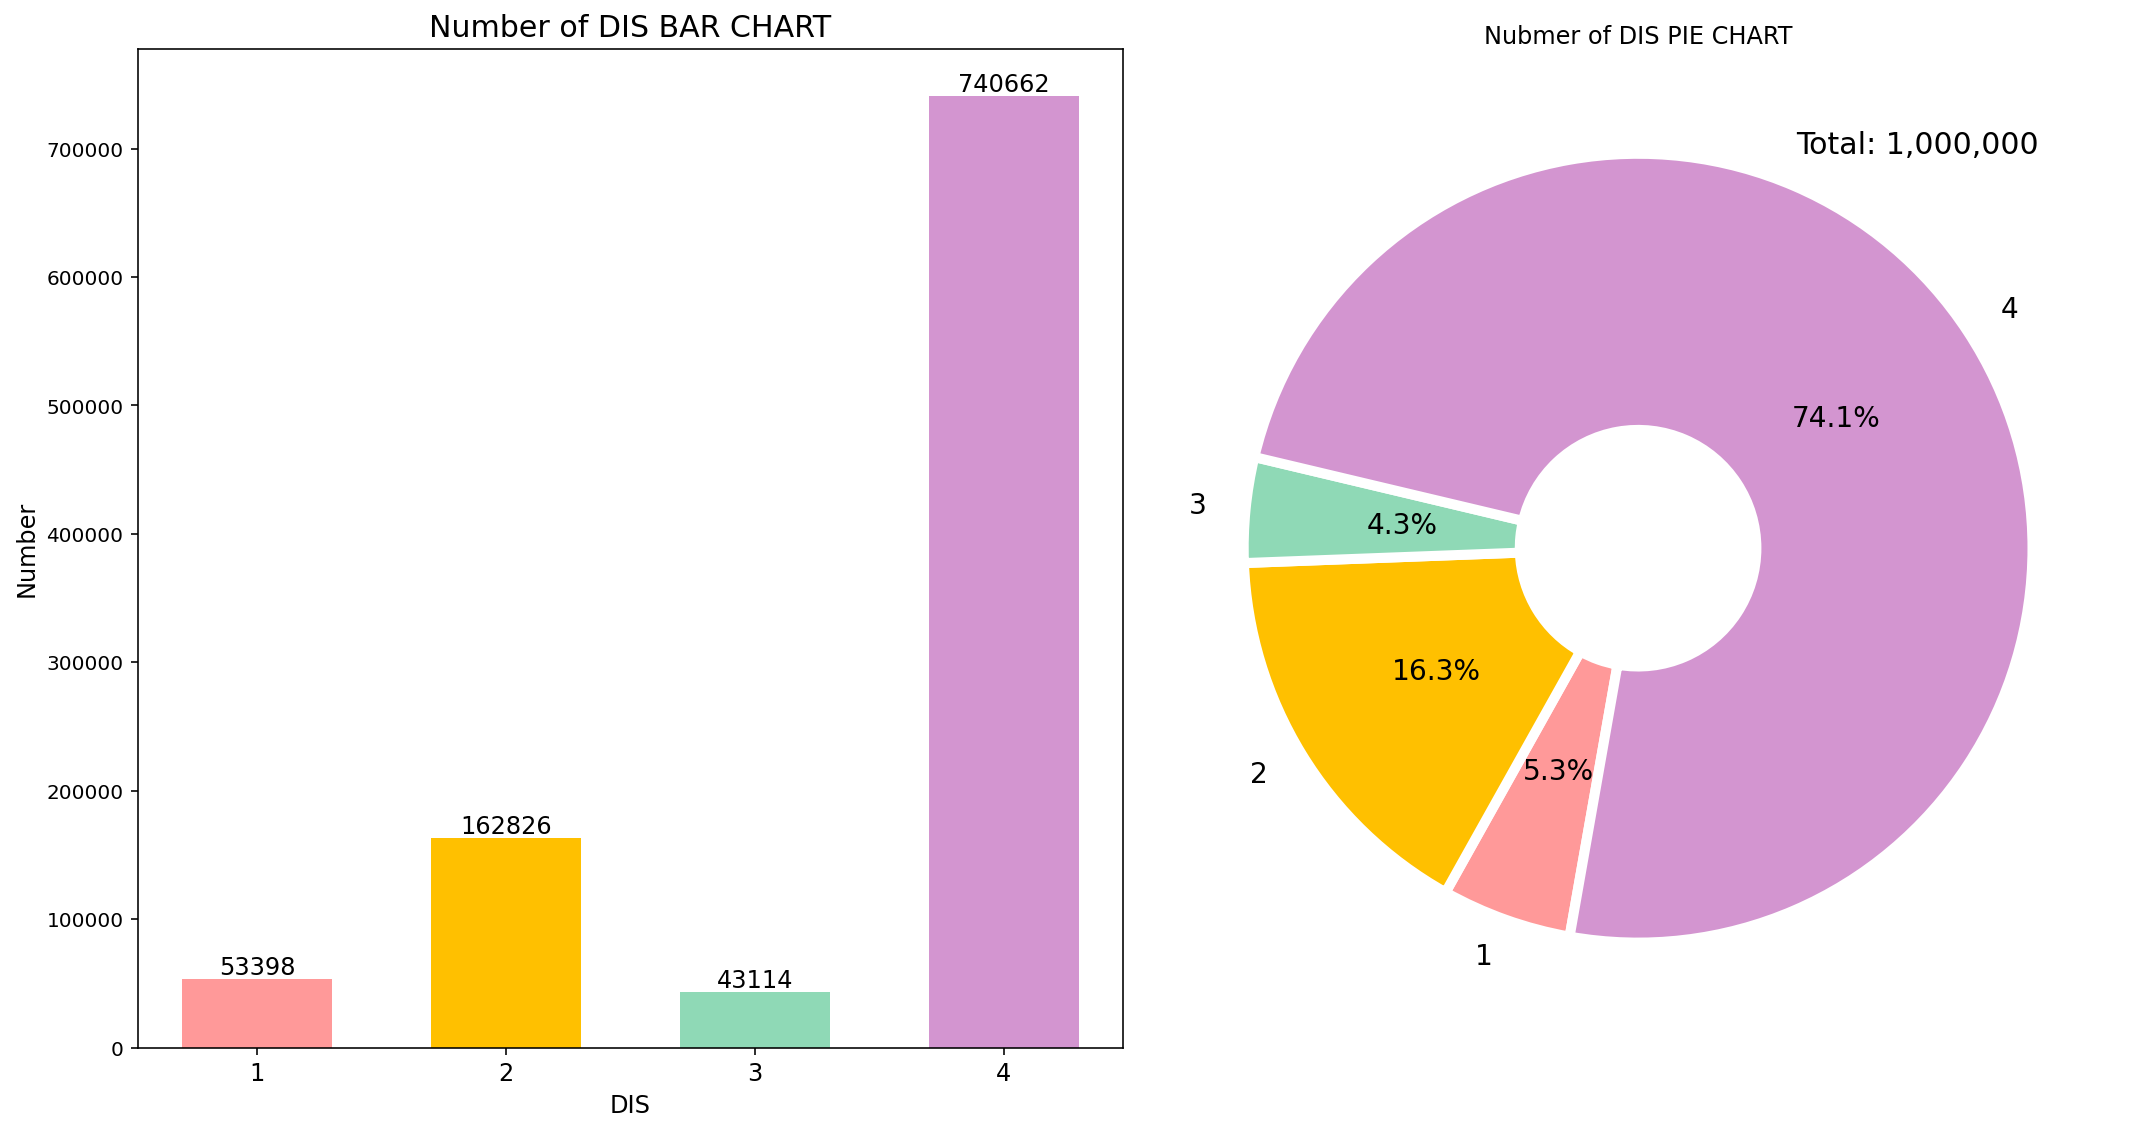

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
bar = plt.bar(DIS_item,DIS_list,color=['#ff9999', '#ffc000', '#8fd9b6', '#d395d0'],width=0.6)
plt.xlabel('DIS', fontsize=12)
plt.ylabel('Number', fontsize=12)
plt.title('Number of DIS BAR CHART', fontsize=15)
plt.xticks(fontsize=12)
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.f' % height, ha='center', va='bottom', size = 12)
plt.subplot(1,2,2)
plt.pie(DIS_list, labels=DIS_item, autopct='%.1f%%', startangle=260, counterclock=False, colors=['#ff9999', '#ffc000', '#8fd9b6', '#d395d0'], wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}, textprops={"fontsize" : 14 })
plt.yticks(fontsize=16)
plt.title("Nubmer of DIS PIE CHART")
plt.text(0.4,1.0,'Total: 1,000,000', fontsize=15)
plt.tight_layout()
plt.show()

## 3.진료내역별 컬럼간의 상관관계

### 컬럼 DIS를 모두 포함한 상관관계

In [ ]:
df_corr = df.loc[:,['SEX','BTH_G','SBP','DBP','FBS','BMI']]
df_corr.corr()

,SEX,BTH_G,SBP,DBP,FBS,BMI
SEX,1.000000,0.085226,-0.168796,-0.190420,-0.101150,-0.170833
BTH_G,0.085226,1.000000,0.275981,0.134484,0.213951,0.088089
SBP,-0.168796,0.275981,1.000000,0.743006,0.186501,0.304383
DBP,-0.190420,0.134484,0.743006,1.000000,0.138717,0.275492
FBS,-0.101150,0.213951,0.186501,0.138717,1.000000,0.173688
BMI,-0.170833,0.088089,0.304383,0.275492,0.173688,1.000000


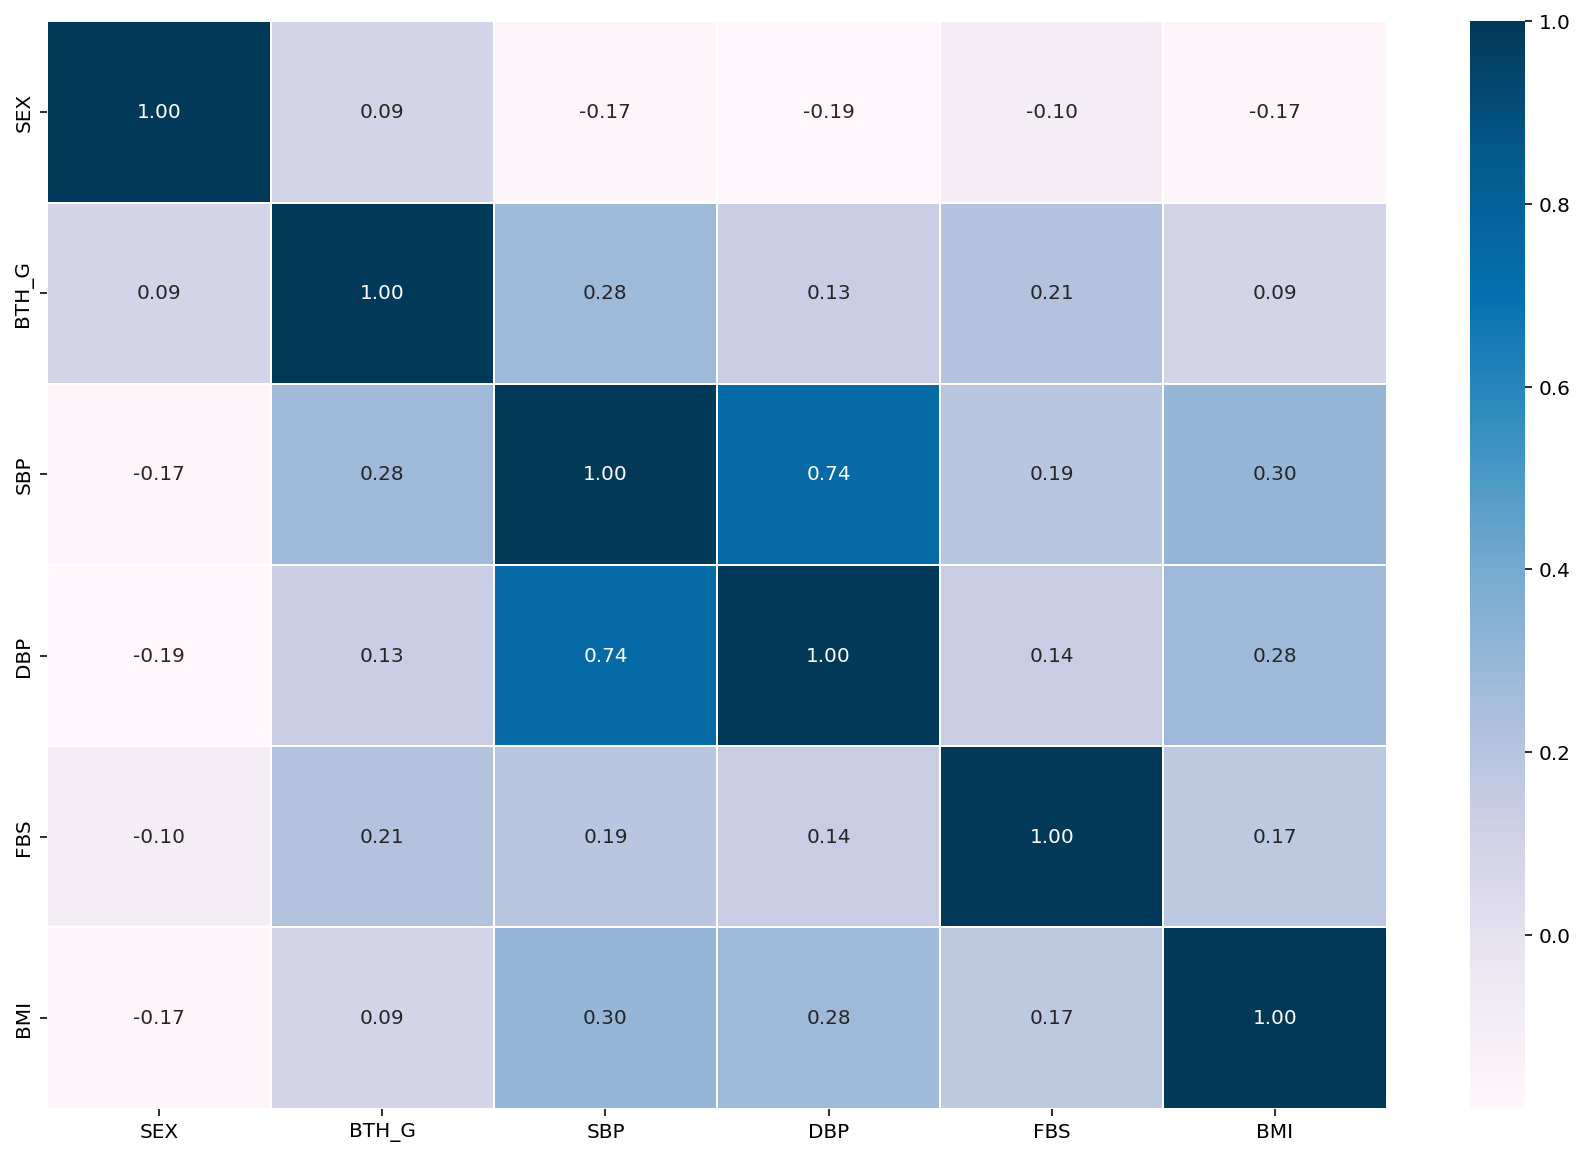

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df_corr.corr(),linewidths=0.5 ,annot=True,cmap='PuBu', fmt = '.2f', cbar=True)
plt.show()

### 'DIS == 1' 당뇨와 고혈압 진료내역이 있는 Row

In [ ]:
df1 = df.loc[(df['DIS']==1),['SEX','BTH_G','SBP','DBP','FBS','BMI']]
corr_df1 = df1.corr(method='pearson', min_periods=1)
corr_df1

,SEX,BTH_G,SBP,DBP,FBS,BMI
SEX,1.000000,0.205341,0.021864,-0.055050,-0.069238,0.027789
BTH_G,0.205341,1.000000,0.071574,-0.159547,-0.156905,-0.205469
SBP,0.021864,0.071574,1.000000,0.631517,0.051611,0.096677
DBP,-0.055050,-0.159547,0.631517,1.000000,0.066167,0.140628
FBS,-0.069238,-0.156905,0.051611,0.066167,1.000000,0.050806
BMI,0.027789,-0.205469,0.096677,0.140628,0.050806,1.000000


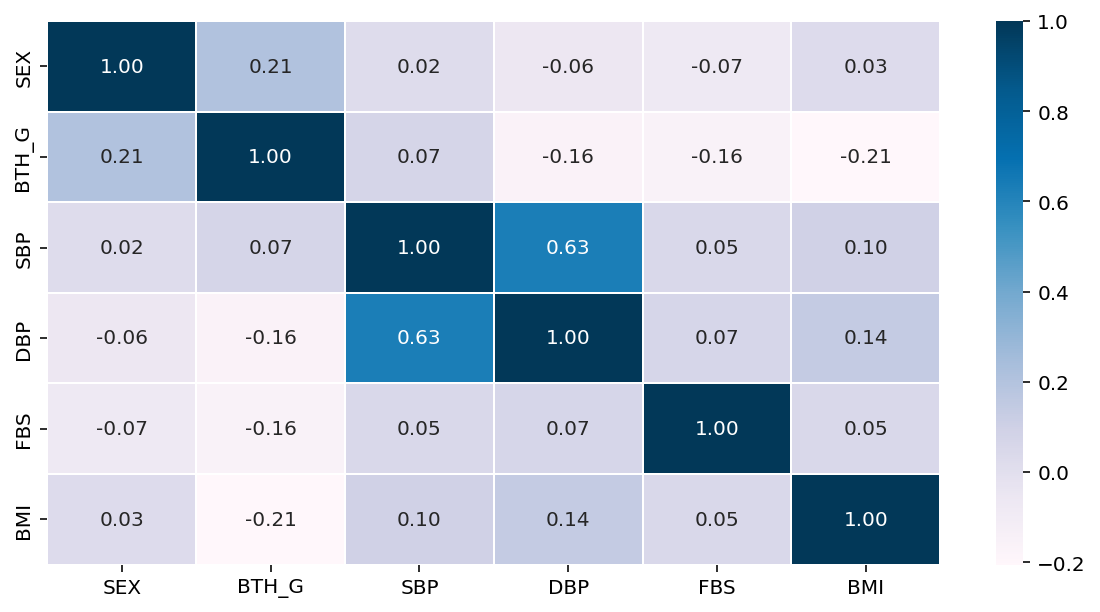

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_df1,linewidths=0.5 ,annot=True,cmap='PuBu', fmt = '.2f', cbar=True)
plt.show()

### 'DIS == 2' 고혈압 진료내역이 있는 Row

In [ ]:
df2 = df.loc[(df['DIS']==2),['SEX','BTH_G','SBP','DBP','FBS','BMI']]
corr_df2 = df2.corr(method='pearson', min_periods=1)
corr_df2

,SEX,BTH_G,SBP,DBP,FBS,BMI
SEX,1.000000,0.182338,-0.015142,-0.080553,-0.094166,-0.035842
BTH_G,0.182338,1.000000,0.044891,-0.174382,0.005172,-0.182036
SBP,-0.015142,0.044891,1.000000,0.672440,0.071735,0.092250
DBP,-0.080553,-0.174382,0.672440,1.000000,0.052032,0.113166
FBS,-0.094166,0.005172,0.071735,0.052032,1.000000,0.116109
BMI,-0.035842,-0.182036,0.092250,0.113166,0.116109,1.000000


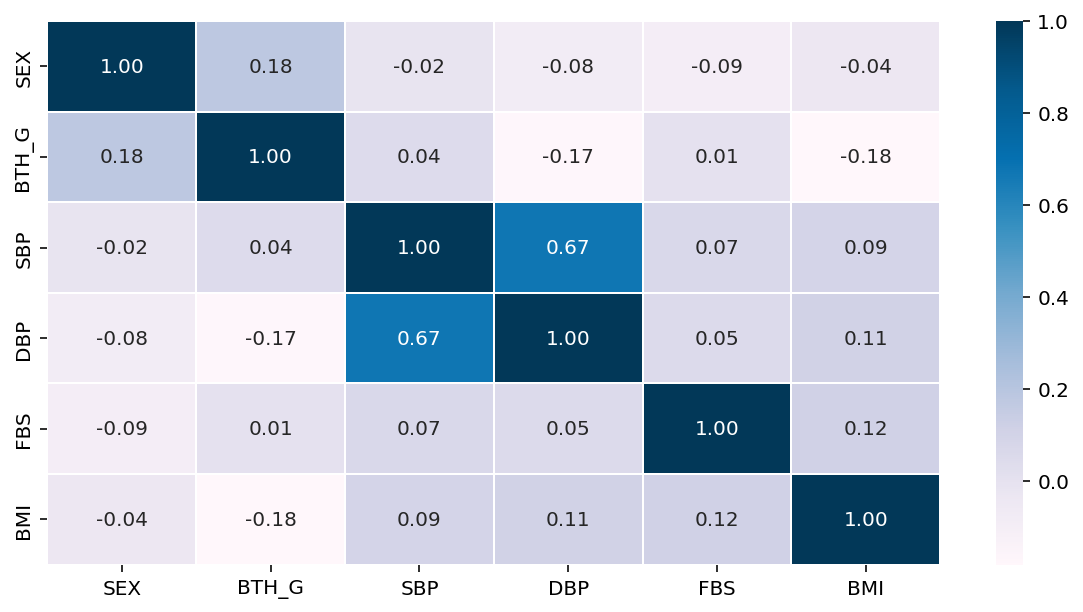

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_df2,linewidths=0.5 ,annot=True,cmap='PuBu', fmt = '.2f', cbar=True)
plt.show()

### 'DIS == 3' 당뇨 진료내역이 있는 Row

In [ ]:
df3 = df.loc[(df['DIS']==3),['SEX','BTH_G','SBP','DBP','FBS','BMI']]
corr_df3 = df3.corr(method='pearson', min_periods=1)
corr_df3

,SEX,BTH_G,SBP,DBP,FBS,BMI
SEX,1.000000,0.106929,-0.054826,-0.110364,-0.108886,-0.029848
BTH_G,0.106929,1.000000,0.133782,-0.078505,-0.141598,-0.143666
SBP,-0.054826,0.133782,1.000000,0.671558,0.055896,0.191048
DBP,-0.110364,-0.078505,0.671558,1.000000,0.085898,0.196146
FBS,-0.108886,-0.141598,0.055896,0.085898,1.000000,0.059556
BMI,-0.029848,-0.143666,0.191048,0.196146,0.059556,1.000000


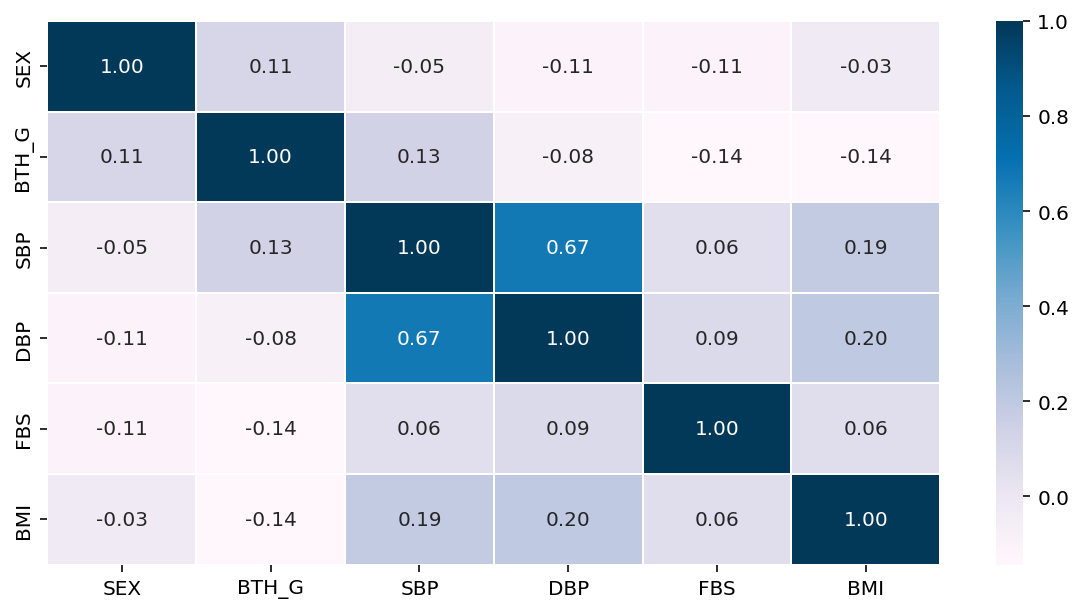

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_df3,linewidths=0.5 ,annot=True,cmap='PuBu', fmt = '.2f', cbar=True)
plt.show()

### 'DIS == 4' 당뇨와 고혈압 진료내역이 없는 Row

In [ ]:
df4 = df.loc[(df['DIS']==4),['SEX','BTH_G','SBP','DBP','FBS','BMI']]
corr_df4 = df4.corr(method='pearson', min_periods=1)
corr_df4

,SEX,BTH_G,SBP,DBP,FBS,BMI
SEX,1.000000,0.074181,-0.244989,-0.240323,-0.132774,-0.229382
BTH_G,0.074181,1.000000,0.178344,0.105961,0.154200,0.036989
SBP,-0.244989,0.178344,1.000000,0.757605,0.189577,0.317498
DBP,-0.240323,0.105961,0.757605,1.000000,0.167972,0.287681
FBS,-0.132774,0.154200,0.189577,0.167972,1.000000,0.180236
BMI,-0.229382,0.036989,0.317498,0.287681,0.180236,1.000000


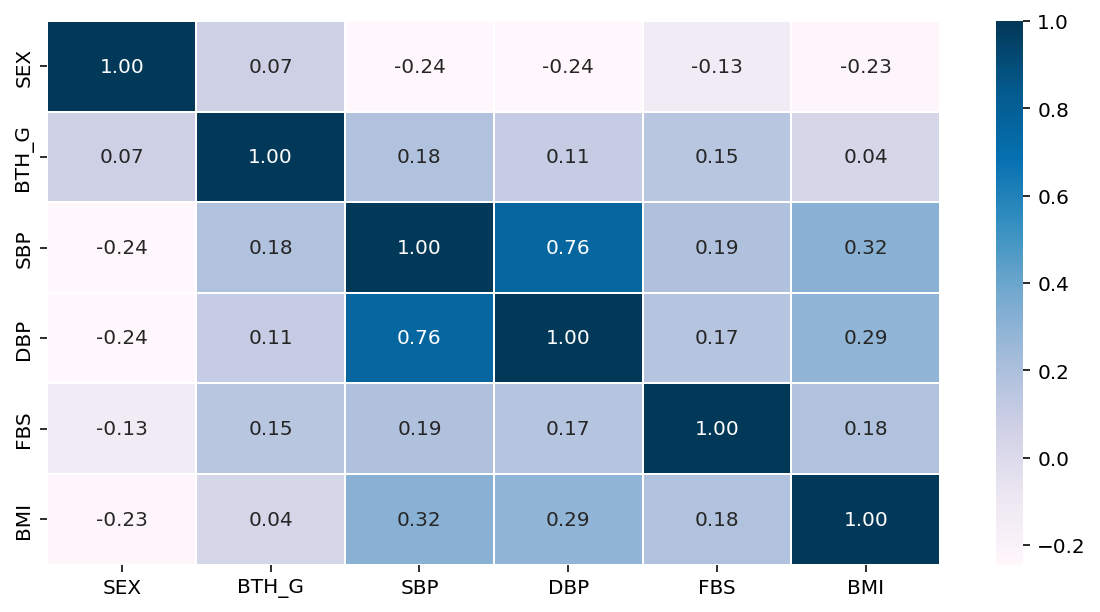

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_df4,linewidths=0.5 ,annot=True,cmap='PuBu', fmt = '.2f', cbar=True)
plt.show()

## 4.Clustering(Kmeans,PCA_Kmeans,DBScan)

### Kmeans

#### Kmeans

In [ ]:
df_f = df.copy()
df_f = df_f.iloc[:,[0,1,2,3,4,6]]

In [ ]:
df_f

,SEX,BTH_G,SBP,DBP,FBS,BMI
0,0,1,116,78,94,16.6
1,0,1,100,60,79,22.3
2,0,1,100,60,87,21.9
3,0,1,111,70,72,20.2
4,0,1,120,80,98,20.0
...,...,...,...,...,...,...
999995,1,27,120,70,81,23.1
999996,1,27,110,70,104,27.2
999997,1,27,115,53,110,25.2
999998,1,27,120,70,90,19.7


- k 값을 찾기 위한 그래프

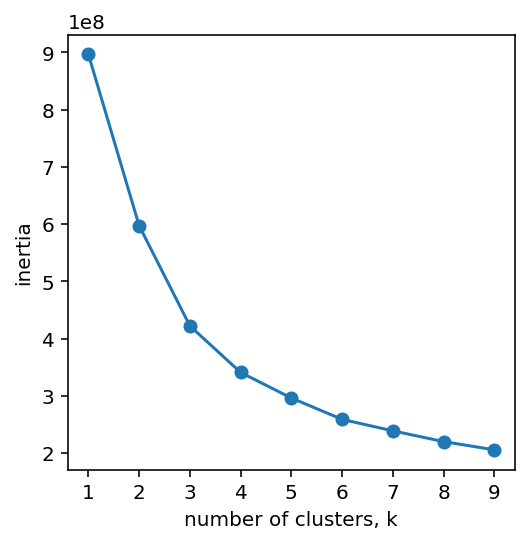

In [ ]:
from sklearn.cluster import KMeans
ks = range(1,10) 
inertias = [] 
for k in ks: 
  model = KMeans(n_clusters=k) 
  model.fit(df_f) 
  inertias.append(model.inertia_) 
  # Plot ks vs inertias 
plt.figure(figsize=(4, 4))  
plt.plot(ks, inertias, '-o') 
plt.xlabel('number of clusters, k') 
plt.ylabel('inertia') 
plt.xticks(ks) 
plt.show()


In [ ]:
from sklearn.cluster import KMeans
clust_model = KMeans(n_clusters = 4, random_state=42, n_init=12)
clust_model.fit(df_f)
centers = clust_model.cluster_centers_ # 각 군집의 중심점 
pred = clust_model.predict(df_f) # 각 예측군집 
print(pd.DataFrame(centers)) 
print(pred[:10])

          0          1           2          3           4          5
0  0.420502  15.372238  133.102668  82.615208   94.994924  24.614111
1  0.391661  17.894114  127.351814  78.147707  129.142973  25.052124
2  0.353713  16.968088  128.485020  79.054732  222.025139  25.123339
3  0.578253  11.546710  110.678296  69.252926   90.270415  22.753620
[3 3 3 3 3 3 3 3 0 3]


In [ ]:
clust_df = df_f.copy()
clust_df['DIS'] = df.iloc[:,5] 
clust_df['clust'] = pred 
clust_df.head()

,SEX,BTH_G,SBP,DBP,FBS,BMI,DIS,clust
0,0,1,116,78,94,16.6,4,3
1,0,1,100,60,79,22.3,4,3
2,0,1,100,60,87,21.9,4,3
3,0,1,111,70,72,20.2,4,3
4,0,1,120,80,98,20.0,4,3


/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


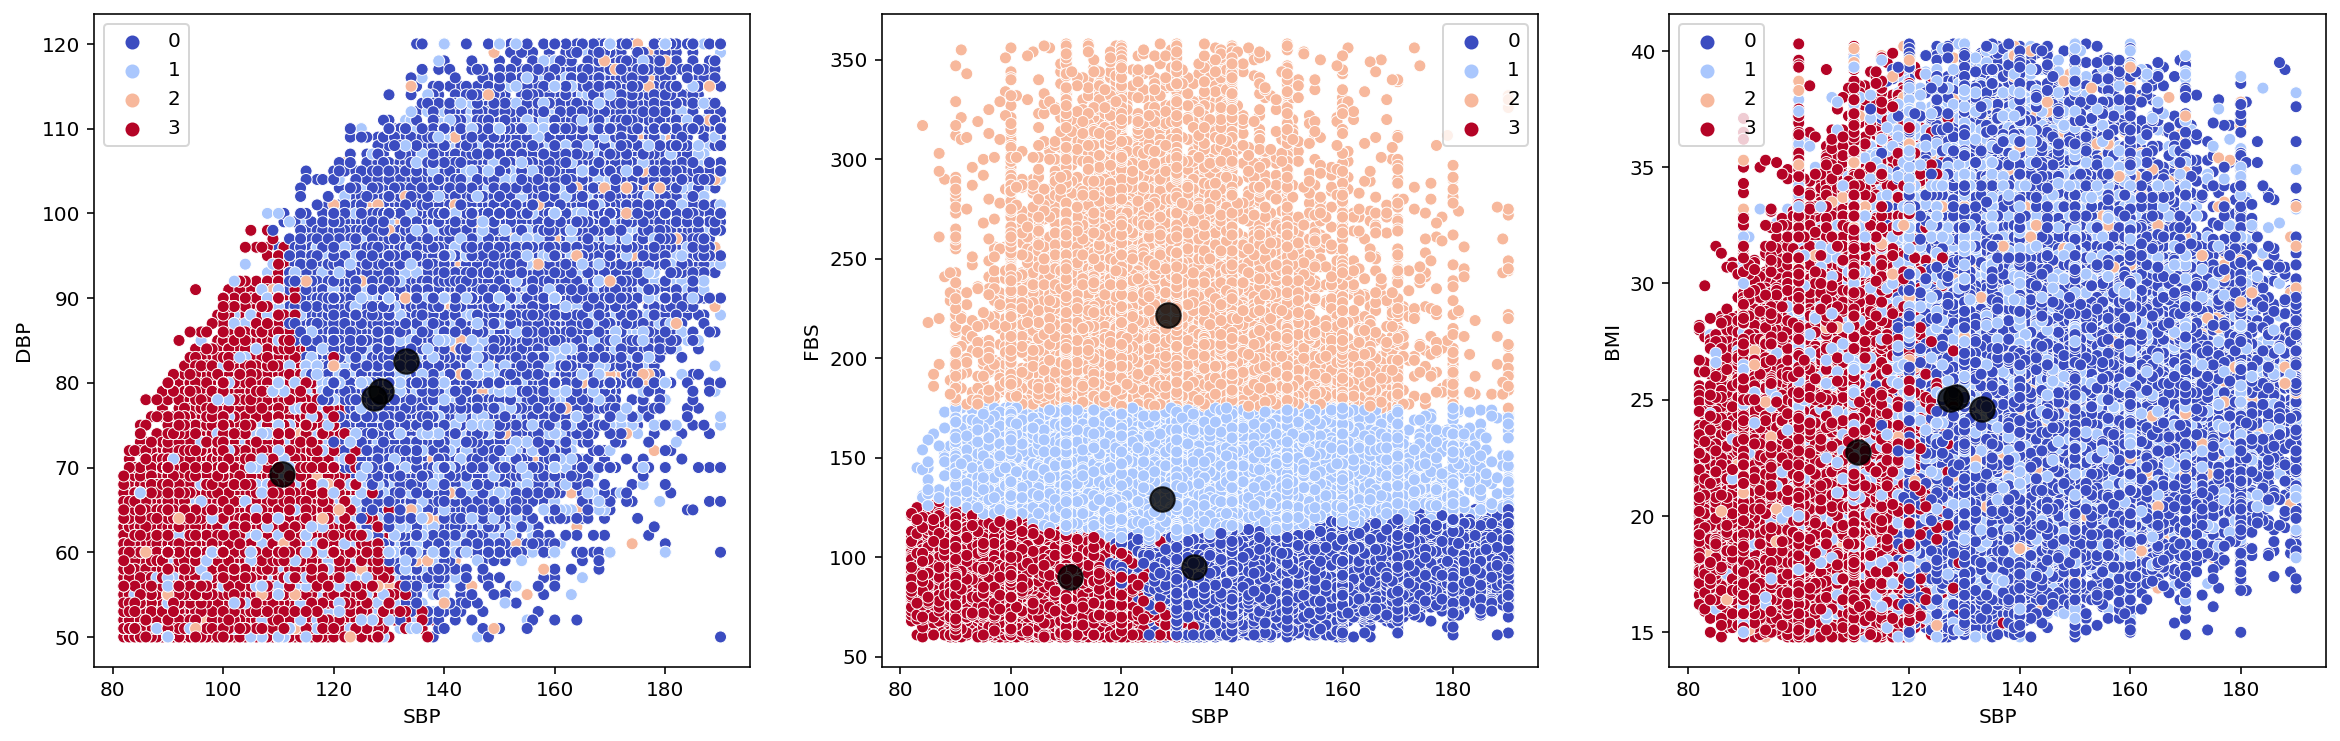

In [ ]:
plt.figure(figsize=(20, 6)) 
X = clust_df 
plt.subplot(131) 
sns.scatterplot(x=X.iloc[:,2], y=X.iloc[:,3], data=df_f, hue=clust_model.labels_, palette='coolwarm') 
plt.scatter(centers[:,2], centers[:,3], c='black', alpha=0.8, s=150) 
plt.subplot(132) 
sns.scatterplot(x=X.iloc[:,2], y=X.iloc[:,4], data=df_f, hue=clust_model.labels_, palette='coolwarm') 
plt.scatter(centers[:,2], centers[:,4], c='black', alpha=0.8, s=150) 
plt.subplot(133) 
sns.scatterplot(x=X.iloc[:,2], y=X.iloc[:,5], data=df_f, hue=clust_model.labels_, palette='coolwarm') 
plt.scatter(centers[:,2], centers[:,5], c='black', alpha=0.8, s=150)

In [ ]:
clust_df.head()

,SEX,BTH_G,SBP,DBP,FBS,BMI,DIS,clust
0,0,1,116,78,94,16.6,4,3
1,0,1,100,60,79,22.3,4,3
2,0,1,100,60,87,21.9,4,3
3,0,1,111,70,72,20.2,4,3
4,0,1,120,80,98,20.0,4,3


In [ ]:
cluster_mean= clust_df.groupby('clust').mean() 
cluster_mean

,SEX,BTH_G,SBP,DBP,FBS,BMI,DIS
clust,,,,,,,
0,0.420483,15.372778,133.099732,82.613395,95.004490,24.614350,3.351612
1,0.391657,17.897121,127.358138,78.149219,129.185051,25.052166,2.730637
2,0.353562,16.968191,128.478967,79.053361,222.053605,25.122871,2.419623
3,0.578247,11.547185,110.677893,69.252642,90.272360,22.753810,3.794842
